# Author : Sukarn Pahuja
## The Sparks Foundation - Data Science and Business Analytics (GRIP JUNE'21)

# TASK-2 : Prediction Using  Unsupervised ML
- From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually. 
- Use R or Python or perform this task
- Dataset : https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

### Importing Data

In [3]:
#creating a dataframe
df = pd.read_csv('Iris.csv')

#the first 10 rows of the data frame
print('DATA IMPORTED.')
df.head(10)

DATA IMPORTED.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Data Descriptions

In [4]:
# data frame structure
print('The Data Frame Structure')
df.info()

The Data Frame Structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#statistical description of data frame
print('Statistical Description of the Data Frame')
df.describe()

Statistical Description of the Data Frame


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#shape of the data frame
print('Shape of Data Frame:')
df.shape

Shape of Data Frame:


(150, 6)

In [7]:
#coloumns and rows
print('1) Coloumns in Data Frame ---> ',df.columns)
print('2) Rows in Data Frame --->  ',df.index)

1) Coloumns in Data Frame --->  Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
2) Rows in Data Frame --->   RangeIndex(start=0, stop=150, step=1)


In [8]:
# checking for NaN (not a number) values for each coloumn
print('Nan Values for each coloumn:')
df.isna().sum()

Nan Values for each coloumn:


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**All the values in the dataset are numbers.**

### Visualizing Data

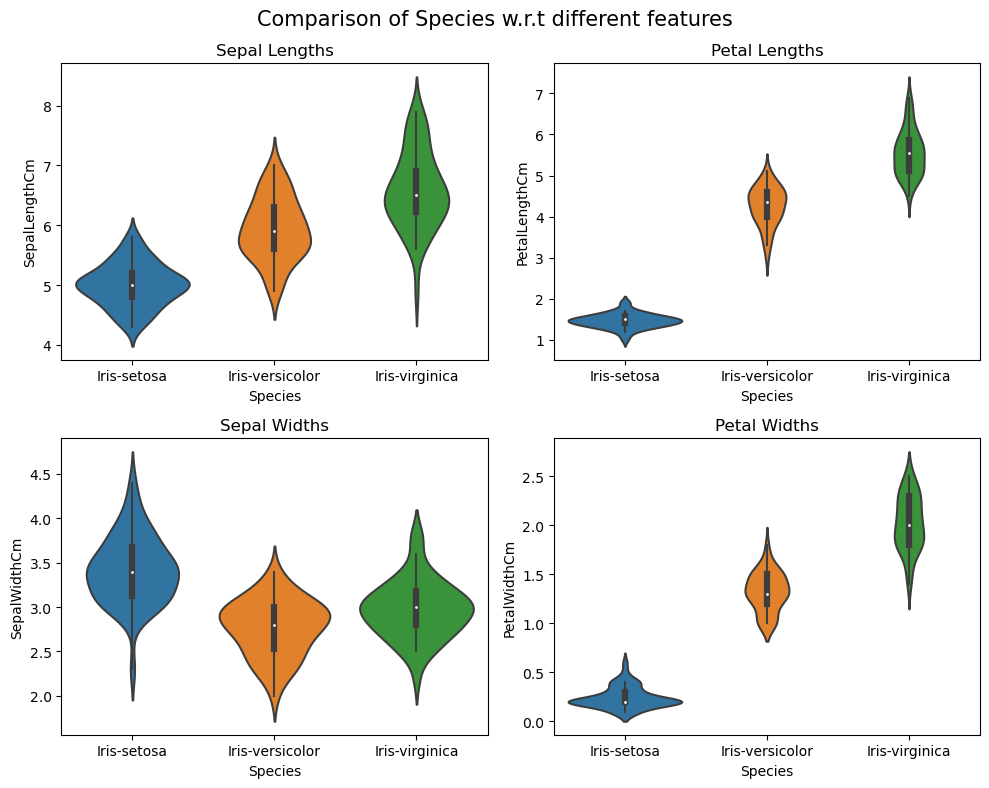

In [9]:
# comparison of species with respect to features
fig,axes = plt.subplots(2,2,figsize=(10,8),dpi=100)
plt.suptitle('Comparison of Species w.r.t different features',size=15)
sns.violinplot(x='Species',y='SepalLengthCm',data=df,ax=axes[0,0])
axes[0,0].set_title('Sepal Lengths',size=12)
sns.violinplot(x='Species',y='PetalLengthCm',data=df,ax=axes[0,1])
axes[0,1].set_title('Petal Lengths',size=12)
sns.violinplot(x='Species',y='SepalWidthCm',data=df,ax=axes[1,0])
axes[1,0].set_title('Sepal Widths',size=12)
sns.violinplot(x='Species',y='PetalWidthCm',data=df,ax=axes[1,1])
axes[1,1].set_title('Petal Widths',size=12)
plt.tight_layout()
plt.show()

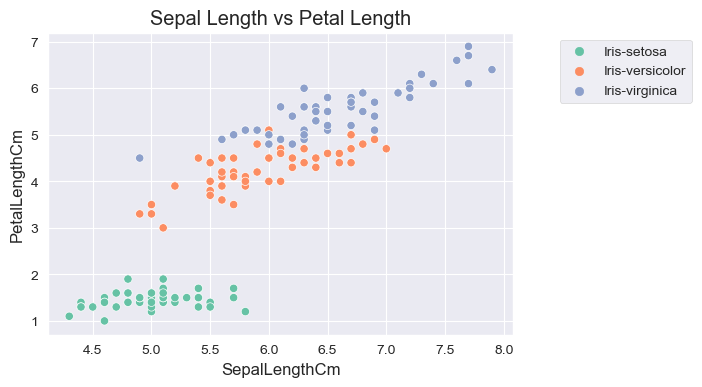

In [19]:
# sepal-petal length comparison
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species',palette='Set2')
plt.title('Sepal Length vs Petal Length')
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

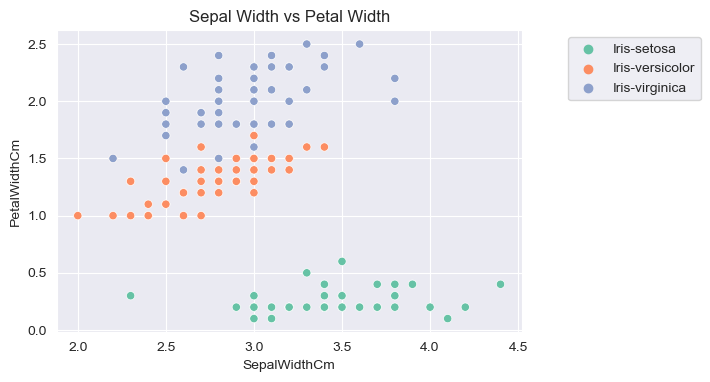

In [11]:
# Sepal-Petal Width comparison
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',palette='Set2')
plt.title('Sepal Width vs Petal Width')
plt.legend(bbox_to_anchor=(1.4,1))
plt.show()

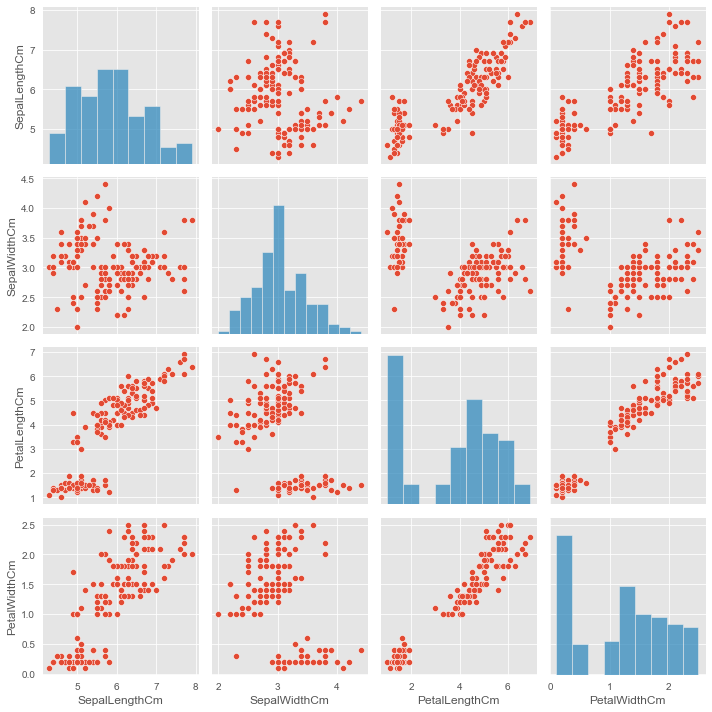

In [20]:
#pairplot
plt.style.use('ggplot')
sns.pairplot(df,x_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
            y_vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Heatmap')

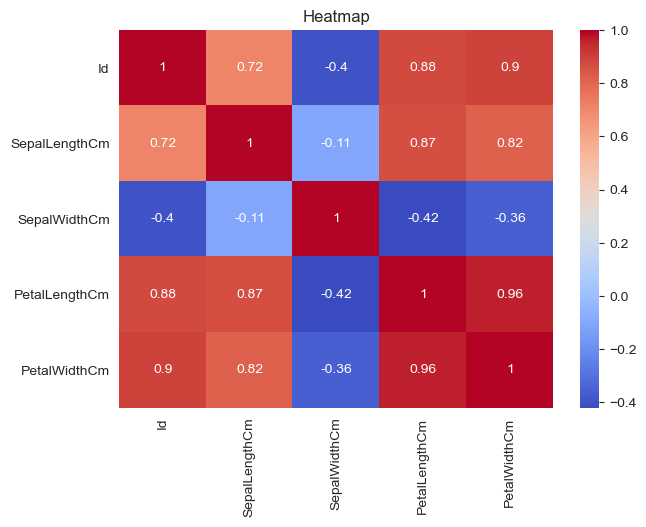

In [13]:
#Heatmap
plt.figure(dpi=100,figsize=(7,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Heatmap')

### K Means Clustering for finding Optimum Number of Clusters

In [14]:
#data preprocessing
x = df.iloc[:,[0,1,2,3]].values
print('Preprocessing Complete')

Preprocessing Complete


In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 
    #WCSS values w.r.t number of clusters
    print('Number of Clusters(K):',i,'----',"WCSS:",kmeans.inertia_)

C:\Users\91999\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of Clusters(K): 1 ---- WCSS: 281831.54466666654
Number of Clusters(K): 2 ---- WCSS: 70581.3808
Number of Clusters(K): 3 ---- WCSS: 31320.711199999994
Number of Clusters(K): 4 ---- WCSS: 17758.792503556186
Number of Clusters(K): 5 ---- WCSS: 11468.968747023802
Number of Clusters(K): 6 ---- WCSS: 7921.863473076923
Number of Clusters(K): 7 ---- WCSS: 5911.632365518538
Number of Clusters(K): 8 ---- WCSS: 4541.979023391812
Number of Clusters(K): 9 ---- WCSS: 3571.911095588236
Number of Clusters(K): 10 ---- WCSS: 2943.9331008403374


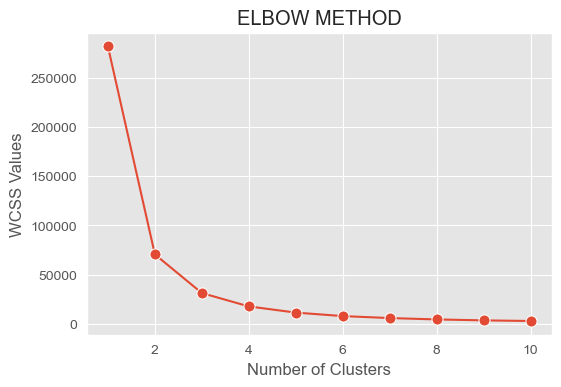

In [16]:
#Plotting : Elbow Method to determine optimum number of clusters
plt.style.use('ggplot')
plt.figure(dpi=100)
sns.lineplot(x=range(1,11),y= wcss,marker='o',markersize=8)
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Values')
plt.show()

**Result: Optimum number of clusters are 3 as the drop after 3 is minimal.**

### Training the Model

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
y_pred = kmeans.fit_predict(x)
print('Model Training')

Model Training


### Visualizing Clusters

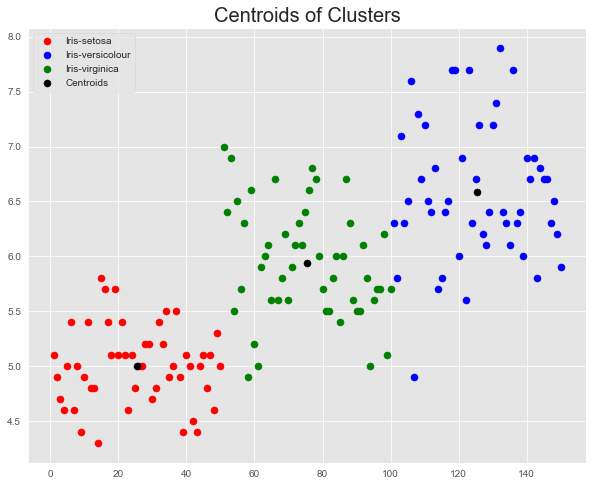

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],s=50,c ='red',label='Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],s=50,c='blue',label='Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s=50,c='green',label='Iris-virginica')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'black', label = 'Centroids')

plt.title('Centroids of Clusters',size=20)
plt.legend()
plt.show()

# Thank You